In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### dataset

In [6]:
test=pd.read_csv("../../sample/6-3-1-logistic-regression.csv")
test.head()

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


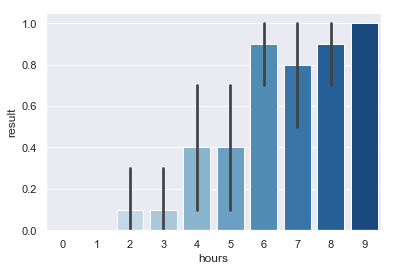

In [14]:
sns.barplot(x="hours",y="result",data=test,palette="Blues")

In [15]:
test.groupby("hours").mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


### モデル

In [16]:
mod = smf.glm(formula = "result ~ hours",data=test,family=sm.families.Binomial()).fit()

In [17]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 27 Oct 2019   Deviance:                       68.028
Time:                        12:54:06   Pearson chi2:                     84.9
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### パラメータ

In [18]:
mod.params

Intercept   -4.558691
hours        0.928890
dtype: float64

### 線形予測子に代入

In [45]:
B = mod.params.values
X = np.array([
    np.ones(len(test)),
    test.hours.values
]).T
X[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [49]:
P=1/(1+sp.exp(-np.dot(X,B)))

### プロット

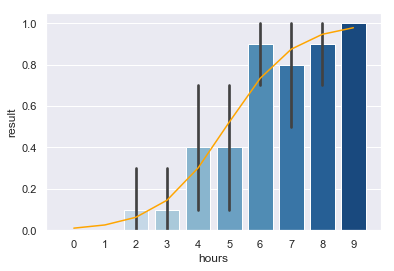

In [66]:
# sns.scatterplot(test.hours,test.result,x_jitter=0.1,y_jitter=0.04)
sns.barplot(x="hours",y="result",data=test,palette="Blues")
plt.plot(X[:,1],P,color="orange")

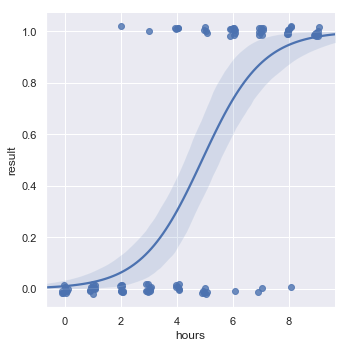

In [74]:
sns.lmplot(x="hours",y="result",data=test,logistic=True,x_jitter=0.1,y_jitter=0.02)
# plt.plot(X[:,1],P,color="orange")
plt.savefig("logistic")

In [72]:
mod.aic

72.02788118117267